Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

## Задание 1

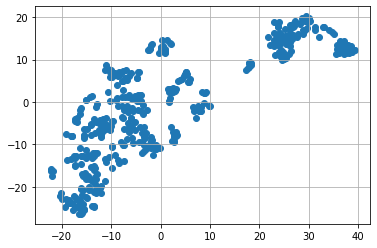

In [2]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.grid()

## Задание 2

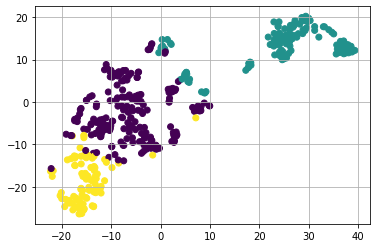

In [3]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
labels_test = kmeans.predict(X_test_scaled)

X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.grid()

In [5]:
#Вычислите средние значения price и CRIM в разных кластерах
#Так как CRIM в DESCR описывается первой, а Price это y, то
for i in [0, 1, 2]:
    print(f'Среднее значение Price в кластере №{i} =  {y_train[labels_train==i].mean()}')
    print(f'Среднее значение CRIM в кластере №{i} = {X_train[labels_train==i, 0].mean()}')


Среднее значение Price в кластере №0 =  24.958115183246072
Среднее значение CRIM в кластере №0 = 0.4216602094240837
Среднее значение Price в кластере №1 =  16.165354330708663
Среднее значение CRIM в кластере №1 = 10.797028425196851
Среднее значение Price в кластере №2 =  27.78837209302326
Среднее значение CRIM в кластере №2 = 0.07356558139534884
